How do you evaluate the apt Price for a second hand car?

You look at the number of years, the type of fuel, how many KMS it has run etc.

In this case study, your task is to create a machine learning model which can predict the Price of a car based on its specs.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "CarPricesData.csv". This file contains 1435 car prices data.

## Data description
The business meaning of each column in the data is as below

* <b>Price</b>: The Price of the car in dollars
* <b>Age</b>: The age of the car in months
* <b>KM</b>: How many KMS did the car was used
* <b>FuelType</b>: Petrol/Diesel/CNG car
* <b>HP</b>: Horse power of the car
* <b>MetColor</b>: Whether car has metallic color or not
* <b>Automatic</b>: Whether car has automatic transmission or not
* <b>CC</b>: The engine size of the car
* <b>Doors</b>: The number of doors in the car
* <b>Weight</b>: The weight of the car

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
CarPricesData=pd.read_csv('E:/IVY/ML with PYTHON/Materials/Dataset/Python Datasets/Python Datasets/Regression Datasets/CarPricesData.csv', encoding='latin')
print('Shape before deleting duplicate values:', CarPricesData.shape)

# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CarPricesData.head(10)

Shape before deleting duplicate values: (1436, 10)
Shape After deleting duplicate values: (1435, 10)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


# Defining the problem statement: 
#### Create a ML model which can predict the apt Price of a Car
* Target Variable: Price
* Predictors: Age, KM, FuelType, CC etc.

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a <b>supervised ML Regression model</b>, as the target variable is Continuous.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

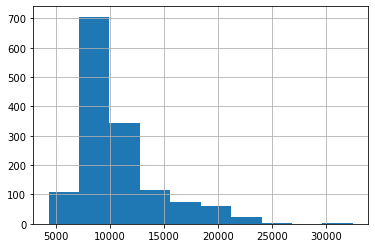

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
CarPricesData['Price'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the Price of the computer?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [6]:
# Looking at the descriptive statistics of the data
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>Price</b>: Continuous. Selected. This is the <b>Target Variable!</b>
* <b>Age</b>: Continuous. Selected.
* <b>KM</b>: Continuous. Selected.
* <b>FuelType</b>: Categorical. Selected.
* <b>HP</b>: Categorical. Selected.
* <b>MetColor</b>: Categorical. Selected.
* <b>Automatic</b>: Categorical. Selected.
* <b>CC</b>: Categorical. Selected.
* <b>Doors</b>: Categorical. Selected.
* <b>Weight</b>: Continuous. Selected.

# Removing useless columns from the data

There are no qualitative columns in this data

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted six categorical predictors in the data

<b>Categorical Predictors: </b>

'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'
    
We use bar charts to see how the data is distributed for these categorical columns.

In [8]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

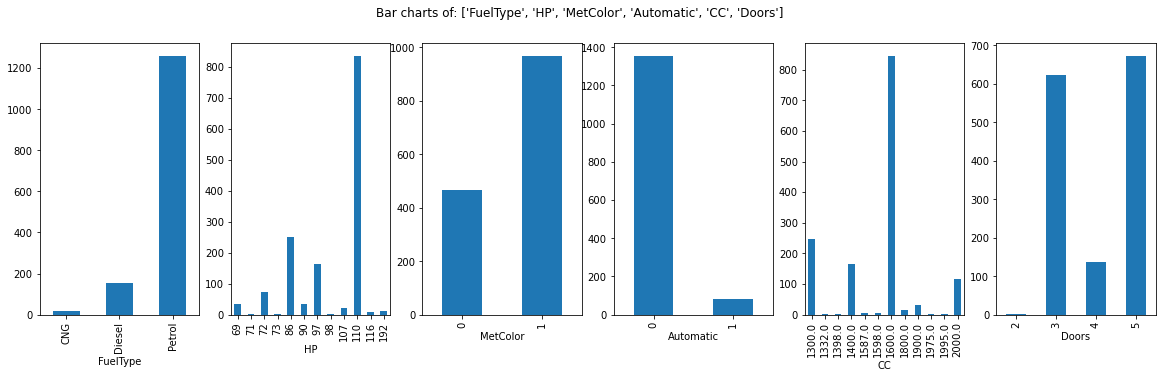

In [9]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType', 'HP', 'MetColor', 
                                                 'Automatic', 'CC', 'Doors'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables 'ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount'.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'KM'}>],
       [<AxesSubplot:title={'center':'Weight'}>, <AxesSubplot:>]],
      dtype=object)

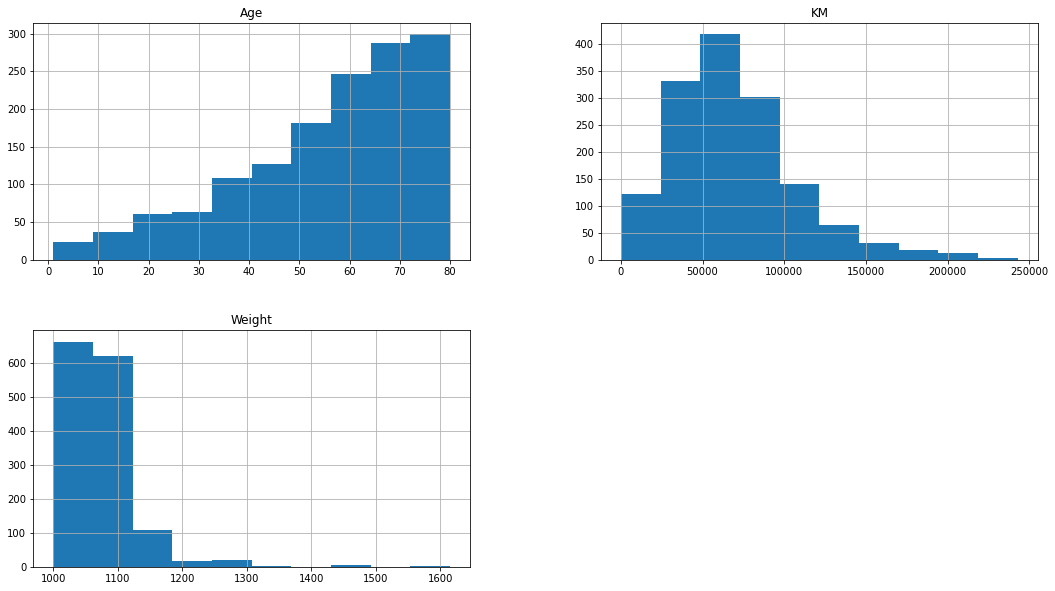

In [10]:
# Plotting histograms of multiple columns together
CarPricesData.hist(['Age','KM','Weight'], figsize=(18,10))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 300 rows in data that has a value between 70 to 80.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Age</b> : Selected. The distribution is good.
* <b>KM</b>: Selected. The distribution is good.
* <b>Weight</b>: Selected. The distribution is good. Outliers are seen beyond 1400, need to treat them.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Treating outliers for 'Weight' column

In [11]:
# Finding logical value near 1400
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

138     1320.0
112     1320.0
115     1280.0
68      1275.0
119     1275.0
         ...  
690     1000.0
1410    1000.0
957     1000.0
927     1000.0
1000    1000.0
Name: Weight, Length: 1428, dtype: float64

Based on the above output, the nearest logical value is 1320, hence, replacing any value greater than 1400 with it.

In [12]:
# Replacing outliers with nearest logical value
CarPricesData['Weight'][CarPricesData['Weight']>1400]=1320

# Visualizing the distribution again after outlier treatment

<AxesSubplot:>

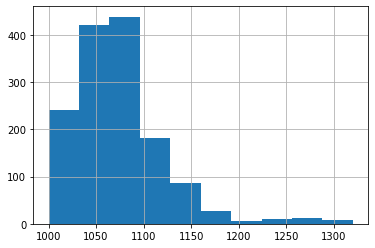

In [13]:
# Histogram for weight after outlier treatment
CarPricesData['Weight'].hist()

The distribution has improved after the outlier treatment. There is still a tail on the right side, but it is thick, hence it is acceptable.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [14]:
# Finding how many missing values are there for each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

I am treating missing values with Median for Continuous values, and Mode for categorical values.

In [15]:
# Treating missing values of categorical variable with MODE value
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True)

In [16]:
# Treating missing values of continuous variable with Median value
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True)
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True)

In [17]:
# Checking missing values again after the treatment
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

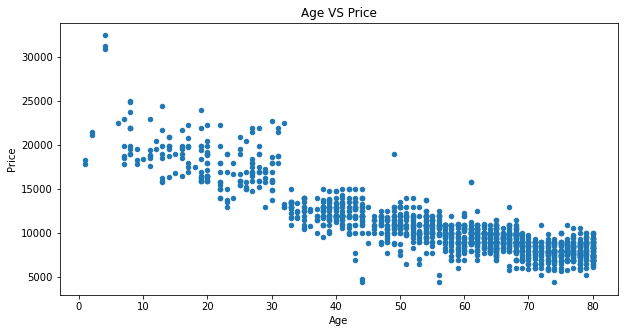

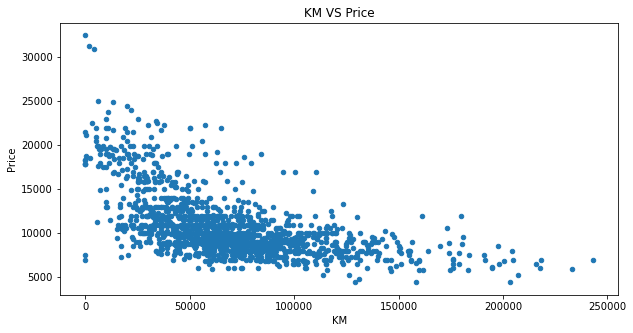

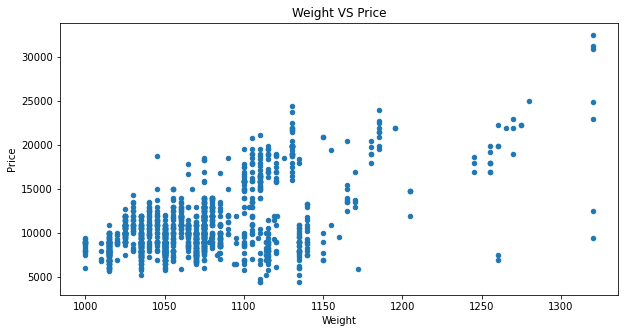

In [18]:
ContinuousCols=['Age','KM','Weight']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CarPricesData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

# Scatter charts interpretation
<b>What should you look for in these scatter charts? </b>

Trend.
You should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not.
You confirm this by looking at the correlation value.

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

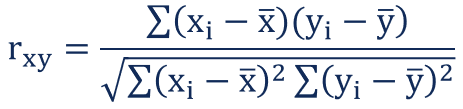

* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [19]:
# Calculating correlation matrix
ContinuousCols=['Price','Age','KM','Weight']

# Creating the correlation matrix
CorrelationData=CarPricesData[ContinuousCols].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.874196,-0.569420,0.589002
Age,-0.874196,1.000000,0.502604,-0.488324
KM,-0.569420,0.502604,1.000000,-0.013607
Weight,0.589002,-0.488324,-0.013607,1.000000


In [20]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price     1.000000
Age      -0.874196
KM       -0.569420
Weight    0.589002
Name: Price, dtype: float64

<b>Final selected Continuous columns:</b>

'Age','KM','Weight'

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

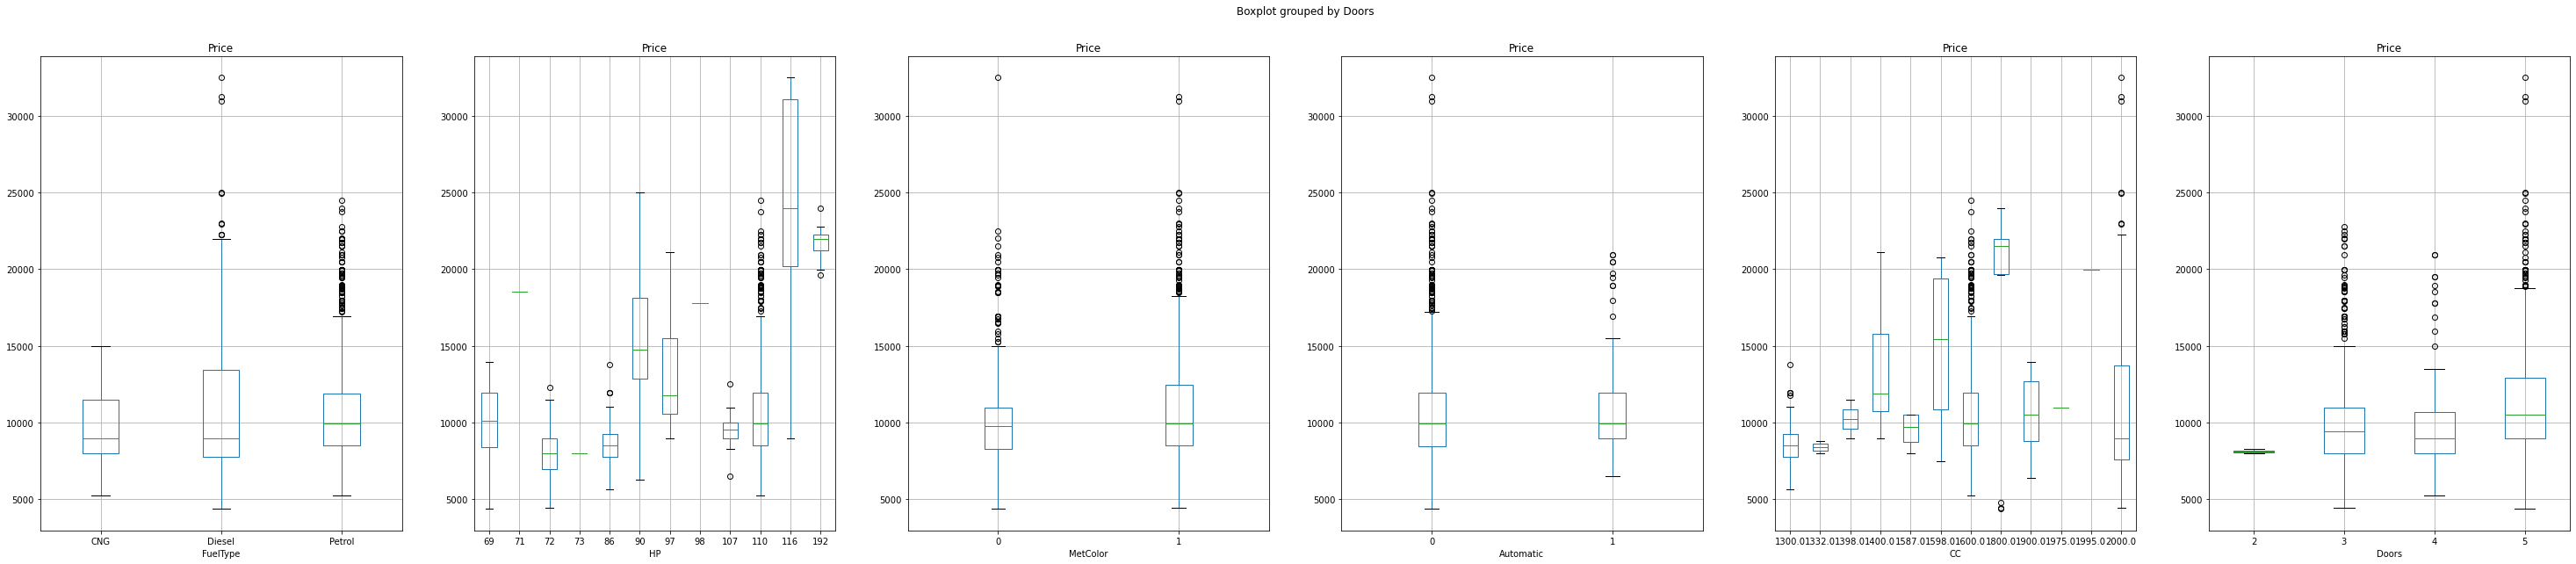

In [21]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CarPricesData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

In this data, all the categorical predictors looks correlated with the Target variable except "Fueltype","Automatic" and "MetColor" they seems like a border cases, as the boxes are close to each other.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [22]:
CategoryGroupLists=CarPricesData.groupby('FuelType')['Price'].apply(list)
CategoryGroupLists

FuelType
CNG       [7750, 11950, 11950, 14950, 12950, 8500, 9250,...
Diesel    [13500, 13750, 13950, 14950, 13750, 12950, 169...
Petrol    [21500, 20950, 19950, 19600, 21500, 22500, 220...
Name: Price, dtype: object

In [23]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [24]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=CarPricesData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

FuelType is NOT correlated with Price | P-Value: 0.07590511356326429
HP is correlated with Price | P-Value: 4.403061434008212e-109
MetColor is correlated with Price | P-Value: 4.4173957971674025e-05
Automatic is NOT correlated with Price | P-Value: 0.19897717506836016
CC is correlated with Price | P-Value: 2.566835080246702e-47
Doors is correlated with Price | P-Value: 9.51180734144394e-13


['HP', 'MetColor', 'CC', 'Doors']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable except "FuelType" and "Automatic". This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'HP', 'MetColor', 'CC', 'Doors'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [25]:
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

# Selecting final columns
DataForML=CarPricesData[SelectedColumns]
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [26]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable which is in string format.

## Converting the binary nominal variable to numeric using 1/0 mapping

There is no binary nominal variable in string format to be converted

## Converting the nominal variable to numeric using get_dummies()

In [27]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=CarPricesData['Price']

# Printing sample rows
DataForML_Numeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [28]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [31]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [30]:
# X_train[0:4]

NameError: name 'X_train' is not defined

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [32]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004,)
(431, 7)
(431,)


In [34]:
X_train[0:4]

array([[0.60759494, 0.30112881, 0.09375   , 0.22764228, 1.        ,
        0.14285714, 0.33333333],
       [0.64556962, 0.55661546, 0.4375    , 0.        , 1.        ,
        0.85714286, 1.        ],
       [0.89873418, 0.43665612, 0.15625   , 0.33333333, 1.        ,
        0.42857143, 0.33333333],
       [0.78481013, 0.29179955, 0.109375  , 0.13821138, 0.        ,
        0.        , 1.        ]])

# Multiple Linear Regression

In [35]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale
# Only if you have standarized the target value as well

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8692060582703884

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   9950         10326.0
1   7995         10308.0
2   7500          8943.0
3   9950          9321.0
4   8950          8752.0
Mean Accuracy on test data: 90.3783799248285
Median Accuracy on test data: 93.21509777171441

Accuracy values for 10-fold Cross Validation:
 [90.06952395 89.67528946 88.80930703 91.98201782 89.29521126 91.81534649
 91.03912263 87.66514203 90.45440946 88.48621601]

Final Average Accuracy of the model: 89.93


In [36]:
TestingDataResults.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,0.734177,0.330985,0.203125,0.333333,1.0,0.428571,0.333333,9950,10326.0,3.778894
1,0.772152,0.266651,0.234375,0.333333,1.0,0.428571,1.000000,7995,10308.0,28.930582
2,0.734177,0.534978,0.421875,0.024390,1.0,1.000000,0.666667,7500,8943.0,19.240000
3,0.860759,0.176128,0.156250,0.333333,1.0,0.428571,0.333333,9950,9321.0,6.321608
4,0.810127,0.193470,0.046875,0.138211,1.0,0.000000,0.333333,8950,8752.0,2.212291


# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.8515408814270037

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   9950          9365.0
1   7995          9365.0
2   7500          9365.0
3   9950          7959.0
4   8950          9365.0
Mean Accuracy on test data: 90.05104599716566
Median Accuracy on test data: 92.8

Accuracy values for 10-fold Cross Validation:
 [83.45164595 87.52441085 86.11810534 86.07782878 86.58615835 90.54523664
 91.78645028 85.63224193 91.26690628 89.39986216]

Final Average Accuracy of the model: 87.84


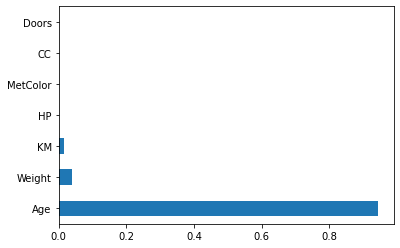

In [38]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [37]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt
# pip install graphviz
# conda install graphviz
# pip install pydotplus

In [39]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/asus/anaconda3/Library/bin/graphviz'

In [40]:
np.var(y_train)

12830860.586795248

In [41]:
np.mean(y_train)

10705.795816733067

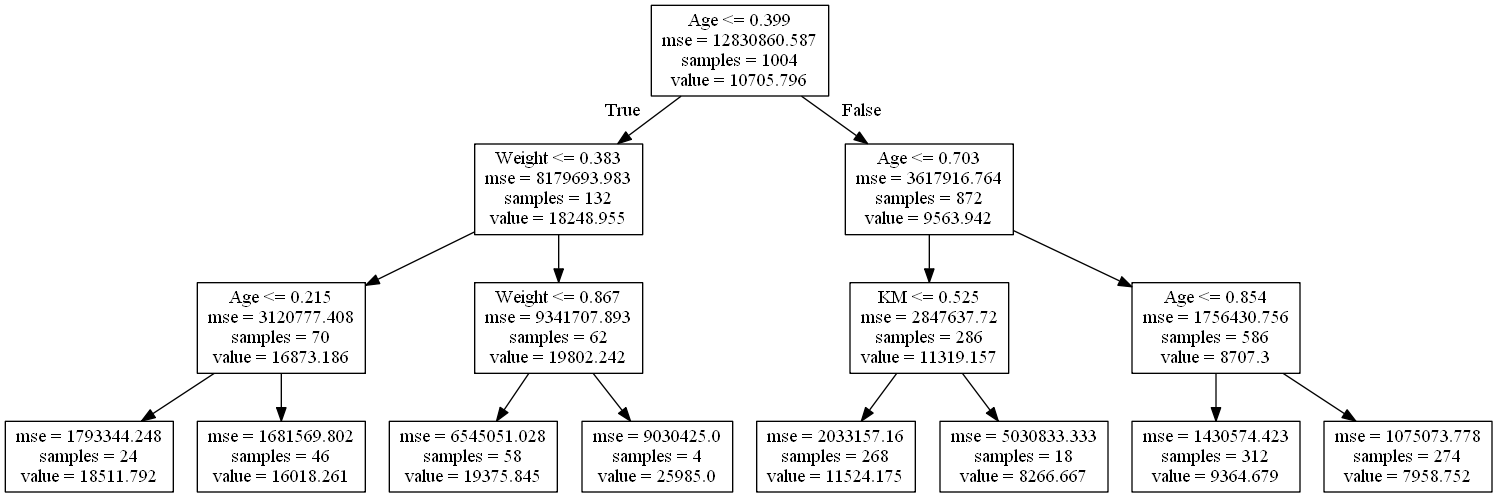

In [42]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## Random Forest

RandomForestRegressor(max_depth=3)
R2 Value: 0.8761611089914922

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   9950          9407.0
1   7995          9407.0
2   7500          9407.0
3   9950          7987.0
4   8950          9342.0
Mean Accuracy on test data: 90.59300234485929
Median Accuracy on test data: 93.14285714285714

Accuracy values for 10-fold Cross Validation:
 [80.73076511 88.43558532 87.57640159 88.52889005 87.09867704 90.62581033
 91.96926607 85.67869296 91.3120502  89.41336508]

Final Average Accuracy of the model: 88.14


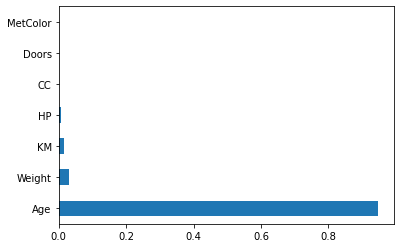

In [43]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=3, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting one of the Decision Trees in Random Forest

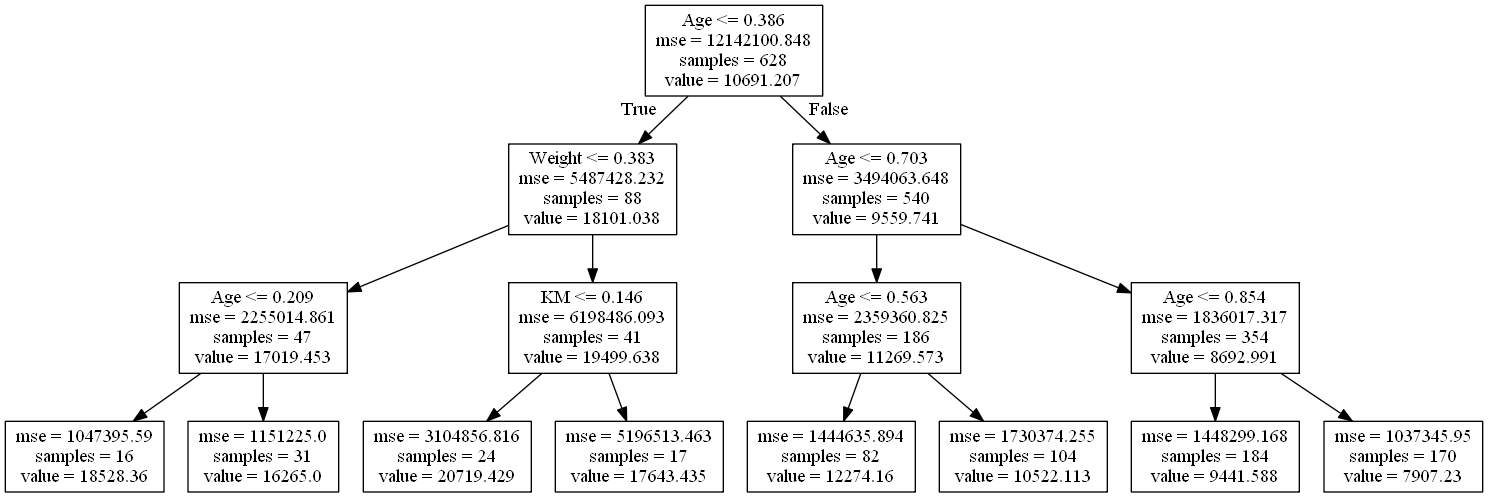

In [44]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[10] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9827444454587544

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   9950         10225.0
1   7995          9957.0
2   7500          7950.0
3   9950          7500.0
4   8950          8818.0
Mean Accuracy on test data: 91.67583738679116
Median Accuracy on test data: 93.65263157894736

Accuracy values for 10-fold Cross Validation:
 [85.53477432 90.65067043 87.4414332  91.01396623 89.09275185 92.37874293
 92.5521143  84.31715133 90.78780913 90.38534276]

Final Average Accuracy of the model: 89.42


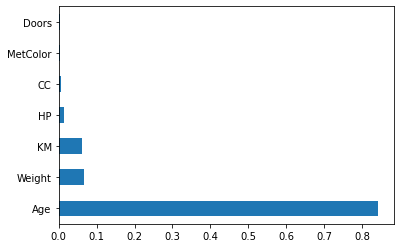

In [45]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 5 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting one of the Decision trees from Adaboost

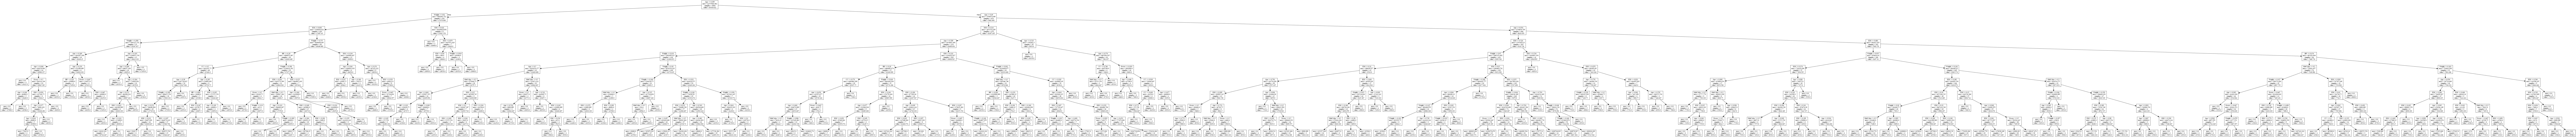

In [46]:
# PLotting 5th single Decision Tree from Adaboost
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=5000)
# Double click on the graph to zoom in

In [ ]:
# Installing xgboost library
!pip install xgboost

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[12:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9654677275095416

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   9950         10178.0
1   7995          9973.0
2   7500   

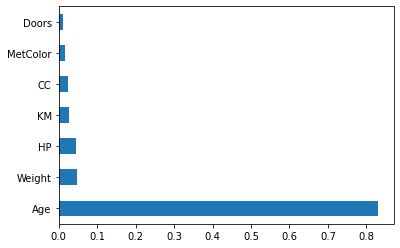

In [48]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a single Decision tree out of XGBoost

<AxesSubplot:>

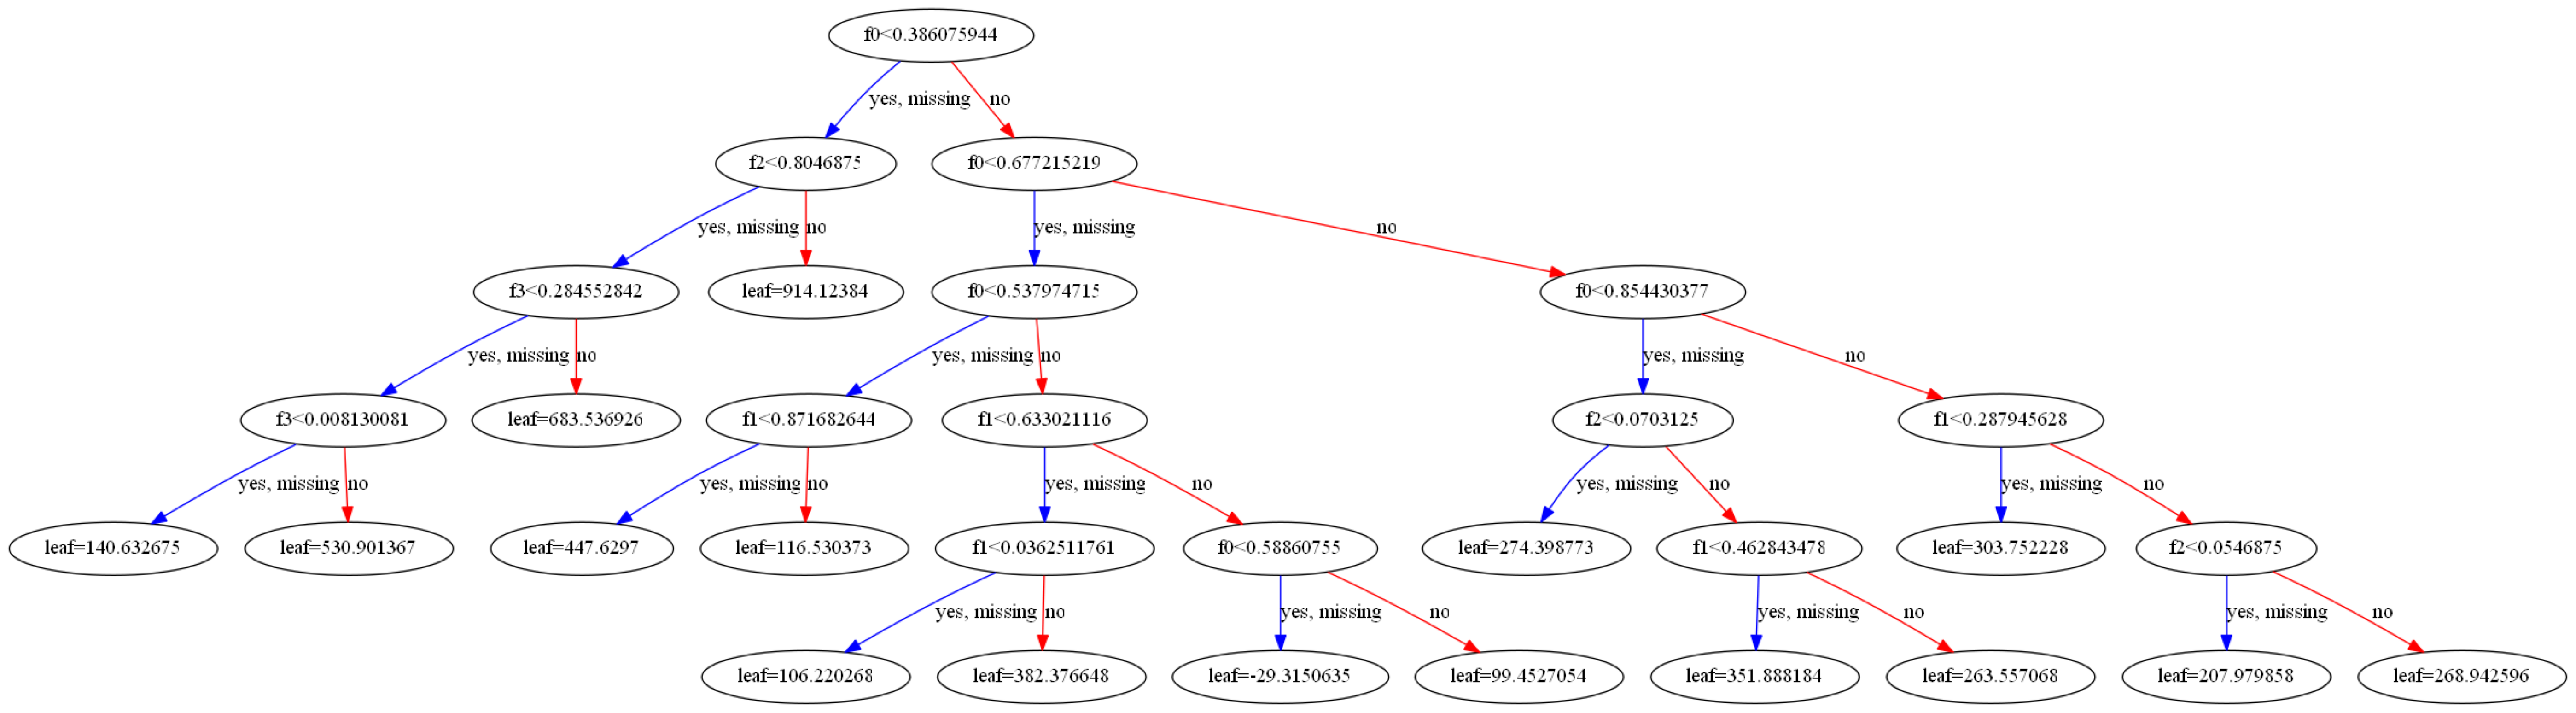

In [49]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 40))
plot_tree(XGB, num_trees=10, ax=ax)
# Double click on the graph to zoom in

## KNN

In [50]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9312644149213976

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   9950          9798.0
1   7995          8967.0
2   7500          8450.0
3   9950          9200.0
4   8950          8817.0
Mean Accuracy on test data: 90.11973198690615
Median Accuracy on test data: 92.13778705636743

Accuracy values for 10-fold Cross Validation:
 [78.69377666 88.11361026 89.9149838  88.06697168 87.08841289 90.29056288
 90.37173613 84.50421991 89.3702435  87.47125092]

Final Average Accuracy of the model: 87.39


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

I am choosing <b>XGBOOST</b> as the final model since it is producing the best accuracy on this data.

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

## Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'Age', 'KM',and 'Weight'.

As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [116]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Age', 'KM', 'Weight']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1435, 3)
(1435,)


#### Cross validating the final model accuracy with less predictors

In [108]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [84.7567721  90.30259973 89.50693886 90.65322611 90.23742034 92.61882561
 92.40896188 87.33084149 91.86475242 90.3969065 ]

Final Average Accuracy of the model: 90.01


In [109]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1. Retraining the model using 100% data

In [110]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [111]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\asus\ML with Python


#### Step 3. Create a python function

In [112]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Age', 'KM', 'Weight']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [113]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[23,46986,1165],[30,38500,1170.0]],columns=['Age', 'KM', 'Weight'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Age     KM  Weight
0   23  46986  1165.0
1   30  38500  1170.0


,Prediction
0,14417.0
1,15394.0


The Function FunctionPredictResult() can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the cases.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

 ## Creating the model with few parameters

## Function for predictions API

In [123]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_Age, inp_KM, inp_Weight):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Age, inp_KM, inp_Weight]],
     columns=['Age', 'KM', 'Weight'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_Age=23, 
                           inp_KM=46986, 
                           inp_Weight=1165
                             )

'{"Prediction":{"0":14417.0}}'

In [118]:
# Installing the flask library required to create the API
# !pip install flask

## Creating Flask API

In [124]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [125]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Age_value=float(request.args.get('Age'))
        KM_value=float(request.args.get('KM'))
        Weight_value=float(request.args.get('Weight'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Age=Age_value, 
                                                       inp_KM=KM_value, 
                                                       inp_Weight=Weight_value
                                                        )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

## Starting the API engine

In [126]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jan/2021 16:03:42] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [22/Jan/2021 16:03:57] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [22/Jan/2021 16:04:04] "GET /prediction_api?Age=33&KM=40000&Weight=1100 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2021 16:04:15] "GET /prediction_api?Age=33&KM=40000&Weight=1100 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2021 16:04:15] "GET /prediction_api?Age=33&KM=40000&Weight=1100 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2021 16:04:16] "GET /prediction_api?Age=33&KM=40000&Weight=1100 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2021 16:04:56] "GET /prediction_api?Age=33&KM=40000&Weight=1100 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2021 16:05:37] "GET /prediction_api?Age=35&KM=40000&Weight=1100 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2021 16:05:47] "GET /prediction_api?Age=37&KM=40000&Weight=1100 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2021 16:06:04] "GET /prediction_api?Age=37&KM=200&Weight=1100 HTTP/1.1" 200 -
127.0.

## Sample URL to call the API

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?Age=33&KM=40000&Weight=1100

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.